<a href="https://colab.research.google.com/github/venkatesh010196/classification_titanicdata/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from google.colab import drive
drive.mount('/content/drive')

# Specify the path to your dataset on Google Drive
train_file_path = '/content/drive/MyDrive/Colab Notebooks/titanic/train.csv'
test_file_path = '/content/drive/MyDrive/Colab Notebooks/titanic/test.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [70]:
df_test = pd.read_csv(test_file_path)
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
df_train = pd.read_csv(train_file_path)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:

label = df_train['Survived']
df_train = df_train.drop('Survived',axis = 1)

df = df_train.append(df_test)
df.head()


<ipython-input-73-a37e55ab15f7>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Data Exploration and visualization

Displaying survived vs not survived per gender

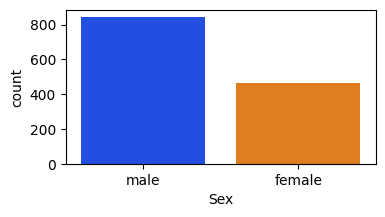

In [57]:
plt.figure(figsize=(4, 2))
sb.countplot(x=df['Sex'],palette='bright')
plt.show()

Displaying survived vs not survived

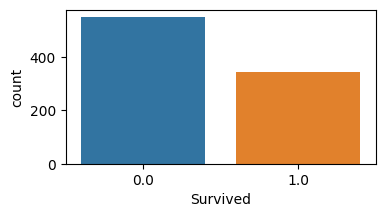

In [58]:
plt.figure(figsize=(4, 2))
sb.countplot(x=df['Survived'])

plt.show()

51.75866823917411
33.29547928134557


<Axes: ylabel='Frequency'>

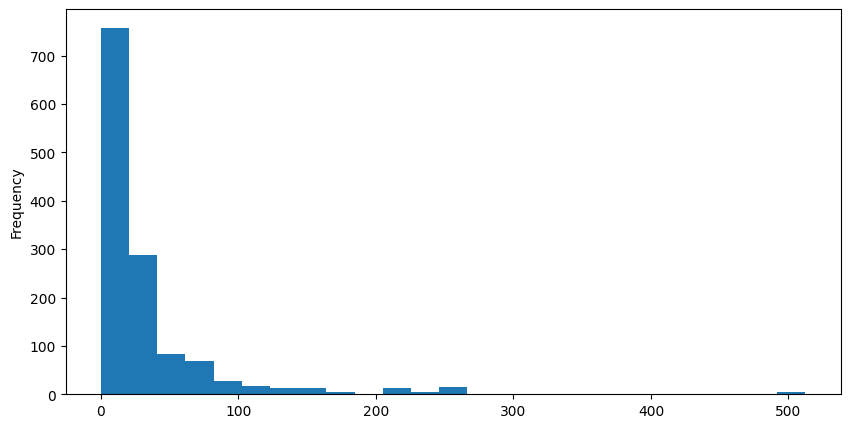

In [59]:
from numpy.core.fromnumeric import mean
fare_std = df['Fare'].std()
mean = df['Fare'].mean()
print(fare_std)
print(mean)

df['Fare'].plot.hist(bins=25, figsize=(10,5))

siblings, spouses aboard(survived vs not survived)

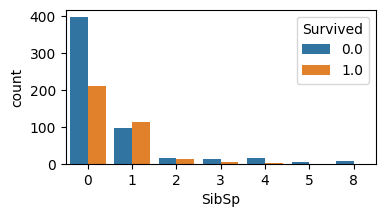

In [60]:
plt.figure(figsize=(4, 2))
sb.countplot(x='SibSp', hue = "Survived", data=df)
plt.show()

parents, childeren aboard(survived vs not survived)

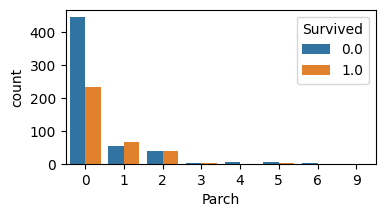

In [61]:
plt.figure(figsize=(4, 2))
sb.countplot(x='Parch', hue = "Survived", data=df)
plt.show()

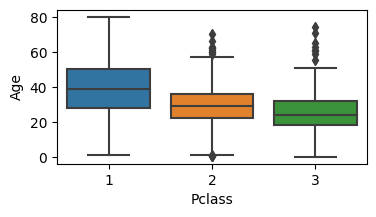

In [62]:
plt.figure(figsize=(4, 2))
sb.boxplot(x='Pclass', y='Age', data=df)
plt.show()

#Data pre-processing

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


Handling missing values

In [64]:
print(df.isnull().sum())


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [79]:
df.drop(['Age', 'Cabin'], axis = 1, inplace = True)


KeyError: ignored

In [80]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

filling the missing values in embarked with the value of the attribute in the last record

In [81]:
df['Embarked'] = df['Embarked'].fillna(method = 'ffill')

checking for any missing values

In [82]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Dropping name, ticket and passengerid from df as they dont corrrelate with other attibutes

In [85]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace = True)

<ipython-input-86-4865a85c9e73>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


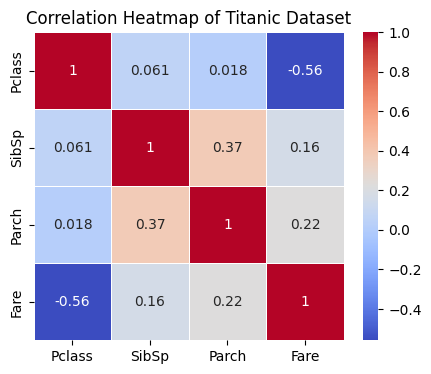

In [86]:
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(5, 4))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()

In [89]:
df['Sex'].unique()
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

Encoding the nominal attributes using one-hot encoding

In [90]:
embarked_onehot = pd.get_dummies(df.Embarked)
data = pd.concat([df,embarked_onehot], axis=1)
data = data.drop("Embarked", axis=1)

sex_onehot= pd.get_dummies(df.Sex)
data = pd.concat([df,sex_onehot], axis=1)
data = data.drop("Sex", axis=1)

In [94]:
df.head()


,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,1,0,7.2500,S
1,1,female,1,0,71.2833,C
2,3,female,0,0,7.9250,S
3,1,female,1,0,53.1000,S
4,3,male,0,0,8.0500,S


In [95]:
df.shape

(1309, 6)

In [96]:
new_train_data = data.iloc[:891,]
new_test_data = data.iloc[891:,]

#Experimenting with various classification models and analysing the results


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


1. logistic regression

2. SVC

3. Naive Bayes classifier

4. DecisionTree classifier

5. Random forest classfier

6. Gradient boosting